# First Quiz

## Dataset column description
HHID: a unique ID per household

TIME: the i-th time the Household is buying pastas

PASTA: Number of pasta bought not an integer because this is n value ($,€...)

EXPO: the number of advertisement seen by the household since the last time the bought pasta

AGE: Socio demo variable, average age of the household

INCOME: Socio demo variable, average income of the household

AREA: the area where lives the household (integer from 1 to 5)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Dataset
df = pd.read_csv("Datasets/PASTAPURCHASE_EDITED.csv")
df.head()

,HHID,TIME,PASTA,EXPOS,AGE,INCOME,AREA
0,1,1,0.939444,1,61.710758,25186.798772,3
1,1,2,2.560969,2,61.710758,25186.798772,3
2,1,3,0.901123,0,61.710758,25186.798772,3
3,1,4,1.916530,1,61.710758,25186.798772,3
4,1,5,1.548751,0,61.710758,25186.798772,3


## 1. What is the correct mean and standard deviation of the quantity of pasta purchased by time unit by household?

In [82]:
hhid = range(1, 2001)
mean_total = 0
for i in hhid:
    df_temp = df[df['HHID'] == i]
    mean = df_temp['PASTA'].sum() / df_temp['TIME'].max()
    mean_total += mean
mean_total / 2000

1.841544538544135

## 2. In which area are located (i) the poorest household and (ii) the wealthiest household?

In [73]:
df_min = df[df['INCOME'] == df['INCOME'].min()]
print("MIN:", df_min['AREA'].iloc[0])

df_max = df[df['INCOME'] == df['INCOME'].max()]
print("MIN:", df_max['AREA'].iloc[0])

MIN: 2
MIN: 5


## 3. What is the maximum pasta quantity a household has bought over the whole time period? (Sum the quantity of pasta by household over time and indicate the maximum)

In [85]:
hhid = range(1, 2001)
maior_hhid = 0
total_pasta = 0
for i in hhid:
    df_temp = df[df['HHID'] == i]
    total = df_temp['PASTA'].sum()
    if total > total_pasta:
        total_pasta = total
        maior_hhid = i
print("Higher HHID:", maior_hhid) 
print("Total Pasta:", total_pasta)

Higher HHID: 1493
Total Pasta: 55.36193058243067


## 4. What is the average income of households living in area 4?

In [86]:
df_temp = df[df['AREA'] == 4]
total_income = 0
for _ in df_temp['HHID'].unique():
    df_temp2 = df_temp[df_temp['HHID'] == _]
    total_income += df_temp2['INCOME'].iloc[0]
print("Avg. Income Area 4:", total_income / len(df_temp['HHID'].unique()))

Avg. Income Area 4: 29260.133137349334


## 5. How many households live in area 2, earn more than 20k, and have purchased more than 30 units of pasta over the whole time period? 

In [78]:
df_area2 = df[df['AREA'] == 2]
df_area2 = df_area2[df_area2['INCOME'] >= 20000]
lista_hhid = []
for _ in df_area2['HHID'].unique():
    df_temp = df_area2[df_area2['HHID'] == _]
    if df_temp['PASTA'].sum() > 30:
        lista_hhid.append(_)
len(lista_hhid)

218

## 6. What is the correlation between the purchases of pasta and the exposures?

In [81]:
df['PASTA'].corr(df['EXPOS'])

0.32661737731864954

## 7. Which of the following graphs reports the correct histogram by household of the total purchase of pasta made by the household over the whole period? (Sum the purchases by household and make a histogram.)

Note that
the color or exact representation may be different in your version.

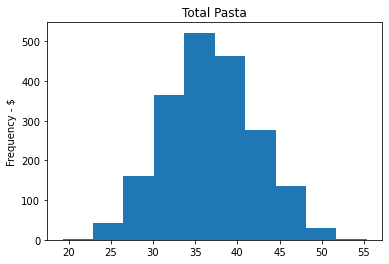

In [96]:
list_total_pasta = []
for _ in df['HHID'].unique():
    df_temp = df[df['HHID'] == _]
    list_total_pasta.append(df_temp['PASTA'].sum())
    
plt.hist(list_total_pasta)
plt.title("Total Pasta")
plt.ylabel("Frequency - $")
plt.show()

## 8. Which of the following graphs reports the correct time series of the overall total purchase of pasta? (Sum the purchases by time units and plot the quantity by time unit.)

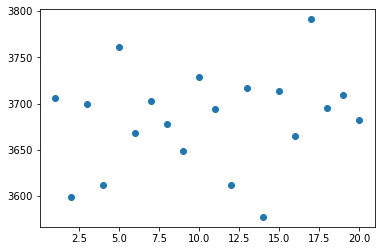

In [13]:
list_total_time = []
list_total_pasta = []
for i in df['TIME'].unique():
    df_temp = df[df['TIME'] == i]
    list_total_pasta.append(df_temp['PASTA'].sum())
    list_total_time.append(i)
    
# plot
fig, ax = plt.subplots()

ax.scatter(list_total_time, list_total_pasta)
plt.show()